# Este notebook tem como finalidade a exploração de dados para obtenção de insigths

## 1. Importar as bibliotecas que serão utlizadas

In [ ]:
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
import numpy as np

# Definir número de clientes
num_clientes = 1000

# Gerar dados fictícios
np.random.seed(42)
dados = {
    "id_cliente": np.arange(1, num_clientes + 1),
    "idade": np.random.randint(18, 70, num_clientes),
    "renda_mensal": np.random.randint(2000, 20000, num_clientes),
    "score_credito": np.random.randint(300, 900, num_clientes),
    "saldo_medio_conta": np.random.randint(0, 50000, num_clientes),
    "qtd_transacoes_mes": np.random.randint(5, 50, num_clientes),
    "uso_cheque_especial": np.random.choice([0, 1], num_clientes, p=[0.7, 0.3]),
    "emprestimos_anteriores": np.random.randint(0, 5, num_clientes),
    "pagamentos_atrasados": np.random.randint(0, 3, num_clientes),
}

# Criar variável alvo (se o cliente solicitou empréstimo)
dados["solicitou_emprestimo"] = np.where(
    (dados["score_credito"] > 600) &
    (dados["renda_mensal"] > 5000) &
    (dados["saldo_medio_conta"] > 1000) &
    (dados["pagamentos_atrasados"] == 0) &
    (dados["emprestimos_anteriores"] < 3), 1, 0
)

# Criar DataFrame
df = pd.DataFrame(dados)
df

,id_cliente,idade,renda_mensal,score_credito,saldo_medio_conta,qtd_transacoes_mes,uso_cheque_especial,emprestimos_anteriores,pagamentos_atrasados,solicitou_emprestimo
0,1,56,8882,597,2169,29,0,1,1,0
1,2,69,3906,335,18556,14,1,1,1,0
2,3,46,5086,383,22052,19,0,1,1,0
3,4,32,15503,751,6313,26,0,4,1,0
4,5,60,10152,684,8315,25,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
995,996,60,17945,747,29084,30,1,4,1,0
996,997,64,9052,533,40387,17,1,2,1,0
997,998,62,5654,862,9280,21,1,4,1,0
998,999,35,17600,561,2642,42,0,1,2,0


### 1.1 Extrair os dados da tabela .csv

# Extrair os dados.csv e utilizar a biblioteca panda

In [ ]:
df.describe()

,id_cliente,idade,renda_mensal,score_credito,saldo_medio_conta,qtd_transacoes_mes,uso_cheque_especial,emprestimos_anteriores,pagamentos_atrasados,solicitou_emprestimo
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.00000
mean,500.500000,43.81900,10979.715000,613.108000,24597.314000,27.259000,0.286000,2.02000,1.00700,0.08300
std,288.819436,14.99103,5231.957405,172.077387,13967.185779,12.791777,0.452115,1.41478,0.80349,0.27602
min,1.000000,18.00000,2009.000000,300.000000,112.000000,5.000000,0.000000,0.00000,0.00000,0.00000
25%,250.750000,31.00000,6428.750000,463.750000,12868.500000,17.000000,0.000000,1.00000,0.00000,0.00000
50%,500.500000,44.00000,11017.500000,616.000000,24207.000000,27.000000,0.000000,2.00000,1.00000,0.00000
75%,750.250000,56.00000,15474.250000,759.250000,36579.500000,38.000000,1.000000,3.00000,2.00000,0.00000
max,1000.000000,69.00000,19988.000000,898.000000,49976.000000,49.000000,1.000000,4.00000,2.00000,1.00000


### 1.2 Verificar os dados que contém na tabela de dados

In [ ]:
# Mostrar os valores da tabela
print(f"~~~~~~~~~~~~~ Os 5 primeiros dados são: ~~~~~~~~~~~~~~~~~ \n\n{df.head()}")

# Mostrar a quantidade de colunas e linhas
print(f"\n\n~~~~~~~~~~~~~ A quantidade de linhas e colunas: ~~~~~~~~~~~~~~~~~ \n\n{df.shape}")

# Mostrar a informações básicas
print(f"\n\n~~~~~~~~~~~~~ Informações: ~~~~~~~~~~~~~~~~~ \n\n{df.info}")

# Mostrar as tipos dos dados
print(f"\n\n~~~~~~~~~~~~~ Tipo dos dados: ~~~~~~~~~~~~~~~~~ \n\n{df.dtypes}")

~~~~~~~~~~~~~ Os 5 primeiros dados são: ~~~~~~~~~~~~~~~~~ 

   id_cliente  idade  renda_mensal  score_credito  saldo_medio_conta  \
0           1     56          8882            597               2169   
1           2     69          3906            335              18556   
2           3     46          5086            383              22052   
3           4     32         15503            751               6313   
4           5     60         10152            684               8315   

   qtd_transacoes_mes  uso_cheque_especial  emprestimos_anteriores  \
0                  29                    0                       1   
1                  14                    1                       1   
2                  19                    0                       1   
3                  26                    0                       4   
4                  25                    0                       0   

   pagamentos_atrasados  solicitou_emprestimo  
0                     1               

Temos 9 categorias para ser analisadas e 344 individuo separados por id

## 2. Verificar se possui dados faltantes

In [ ]:
# Utilizar isnull().sum()
df.isnull().sum()

,0
id_cliente,0
idade,0
renda_mensal,0
score_credito,0
saldo_medio_conta,0
qtd_transacoes_mes,0
uso_cheque_especial,0
emprestimos_anteriores,0
pagamentos_atrasados,0
solicitou_emprestimo,0


Não possui dados faltantes



### 2.1 Verificar se possui dados repetidos.

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


Não possui dados repetidos.

## 3. Verificar os labels dos dados para ser mais simples a visualização

In [ ]:
# Print dos nomes das colunas
print(df.columns)

Index(['id_cliente', 'idade', 'renda_mensal', 'score_credito',
       'saldo_medio_conta', 'qtd_transacoes_mes', 'uso_cheque_especial',
       'emprestimos_anteriores', 'pagamentos_atrasados',
       'solicitou_emprestimo'],
      dtype='object')


### Normalizar os dados

In [ ]:
# Criando novas variáveis
df["razao_saldo_renda"] = df["saldo_medio_conta"] / df["renda_mensal"]
df["razao_score_idade"] = df["score_credito"] / df["idade"]
df["transacoes_por_renda"] = df["qtd_transacoes_mes"] / df["renda_mensal"]
df["atrasos_por_emprestimo"] = df["pagamentos_atrasados"] / (df["emprestimos_anteriores"] + 1)

# Exibir as primeiras linhas do dataset atualizado
print(df.head())

   id_cliente  idade  renda_mensal  score_credito  saldo_medio_conta  \
0           1     56          8882            597               2169   
1           2     69          3906            335              18556   
2           3     46          5086            383              22052   
3           4     32         15503            751               6313   
4           5     60         10152            684               8315   

   qtd_transacoes_mes  uso_cheque_especial  emprestimos_anteriores  \
0                  29                    0                       1   
1                  14                    1                       1   
2                  19                    0                       1   
3                  26                    0                       4   
4                  25                    0                       0   

   pagamentos_atrasados  solicitou_emprestimo  razao_saldo_renda  \
0                     1                     0           0.244202   
1         

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Escolher as colunas para normalizar
colunas_para_normalizar = ["idade", "renda_mensal", "score_credito", "saldo_medio_conta","qtd_transacoes_mes" ]

# Aplicar Min-Max Scaling (0 a 1)
scaler_minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax[colunas_para_normalizar] = scaler_minmax.fit_transform(df[colunas_para_normalizar])

# Aplicar Z-score Normalization
scaler_standard = StandardScaler()
df_standard = df.copy()
df_standard[colunas_para_normalizar] = scaler_standard.fit_transform(df[colunas_para_normalizar])

# Mostrar os dados normalizados
print("Dataset Original:\n", df)
print("\nDataset Normalizado (Min-Max Scaling):\n", df_minmax)
print("\nDataset Normalizado (Z-score):\n", df_standard)

Dataset Original:
      id_cliente  idade  renda_mensal  score_credito  saldo_medio_conta  \
0             1     56          8882            597               2169   
1             2     69          3906            335              18556   
2             3     46          5086            383              22052   
3             4     32         15503            751               6313   
4             5     60         10152            684               8315   
..          ...    ...           ...            ...                ...   
995         996     60         17945            747              29084   
996         997     64          9052            533              40387   
997         998     62          5654            862               9280   
998         999     35         17600            561               2642   
999        1000     55         10636            424              42137   

     qtd_transacoes_mes  uso_cheque_especial  emprestimos_anteriores  \
0                   

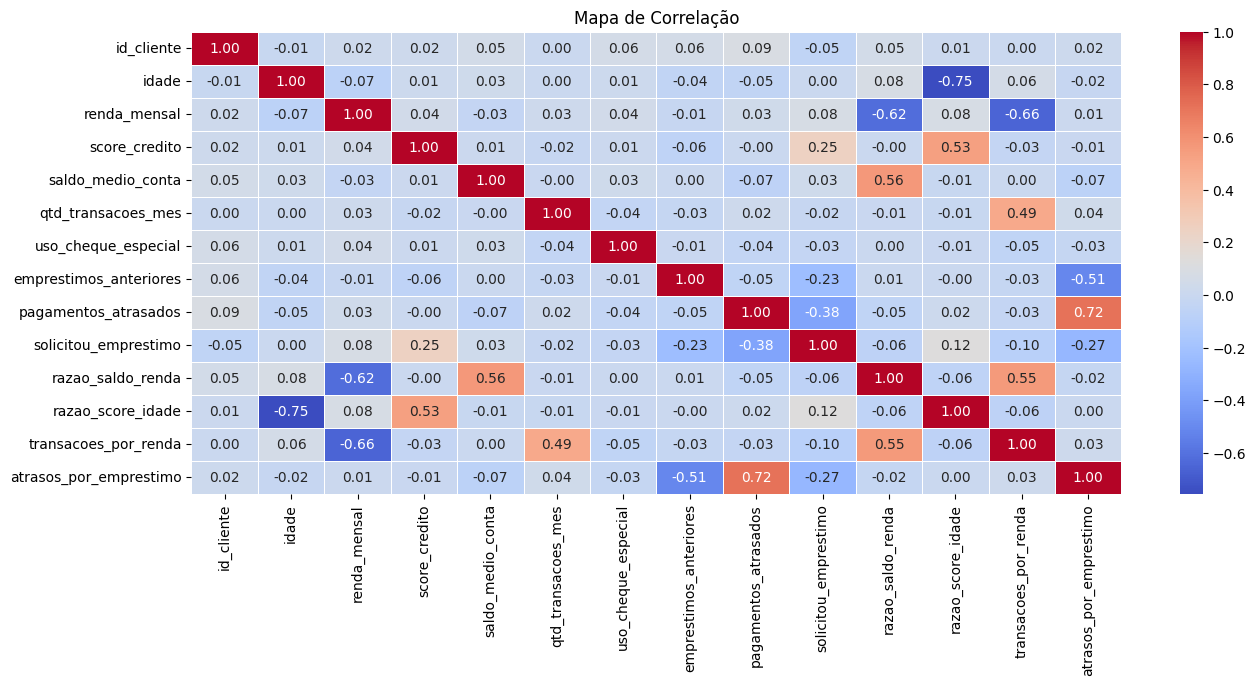

In [ ]:
# Calculando a matriz de correlação
corr = df.corr()

# Criando o heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Exibindo o gráfico
plt.title('Mapa de Correlação')
plt.show()

In [ ]:
## Calculando as matrizes de correlação
#corr_original = df.corr()
#corr_minmax = df_minmax.corr()
#corr_standard = df_standard.corr()

## Criando subplots
#fig, axes = plt.subplots(1, 3, figsize=(18, 6))

## Heatmap para os dados originais
#sns.heatmap(corr_original, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
#axes[0].set_title("Correlação - Dados Originais")

# Heatmap para os dados normalizados (Min-Max)
#sns.heatmap(corr_minmax, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
#axes[1].set_title("Correlação - Min-Max Scaling")

## Heatmap para os dados normalizados (Z-score)
#sns.heatmap(corr_standard, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[2])
#axes[2].set_title("Correlação - Standardization (Z-score)")

## Exibir os gráficos
#plt.tight_layout()
#plt.show()

## Separar as Features(X)e target(y)

In [ ]:
# Separando Features (X) e Target (y)
X = df.drop(columns=["solicitou_emprestimo"])  # Removemos a variável alvo
y = df["solicitou_emprestimo"]
y, X

(0      0
 1      0
 2      0
 3      0
 4      0
       ..
 995    0
 996    0
 997    0
 998    0
 999    0
 Name: solicitou_emprestimo, Length: 1000, dtype: int64,
      id_cliente  idade  renda_mensal  score_credito  saldo_medio_conta  \
 0             1     56          8882            597               2169   
 1             2     69          3906            335              18556   
 2             3     46          5086            383              22052   
 3             4     32         15503            751               6313   
 4             5     60         10152            684               8315   
 ..          ...    ...           ...            ...                ...   
 995         996     60         17945            747              29084   
 996         997     64          9052            533              40387   
 997         998     62          5654            862               9280   
 998         999     35         17600            561               2642   
 999    

## Separar as Features(X)e target(y) Min-Max Scaling (0 a 1)

In [ ]:
# Separando Features (X) e Target (y)
X_minmax = df_minmax.drop(columns=["solicitou_emprestimo"])  # Removemos a variável alvo
y_minmax = df_minmax["solicitou_emprestimo"]
y_minmax, X_minmax

(0      0
 1      0
 2      0
 3      0
 4      0
       ..
 995    0
 996    0
 997    0
 998    0
 999    0
 Name: solicitou_emprestimo, Length: 1000, dtype: int64,
      id_cliente     idade  renda_mensal  score_credito  saldo_medio_conta  \
 0             1  0.745098      0.382279       0.496656           0.041252   
 1             2  1.000000      0.105512       0.058528           0.369886   
 2             3  0.549020      0.171144       0.138796           0.439997   
 3             4  0.274510      0.750542       0.754181           0.124358   
 4             5  0.823529      0.452917       0.642140           0.164507   
 ..          ...       ...           ...            ...                ...   
 995         996  0.823529      0.886367       0.747492           0.581020   
 996         997  0.901961      0.391735       0.389632           0.807697   
 997         998  0.862745      0.202737       0.939799           0.183860   
 998         999  0.333333      0.867178       0.4364

## Separar as Features(X)e target(y) Z-score Normalization

In [ ]:
# Separando Features (X) e Target (y)
X_standard = df_minmax.drop(columns=["solicitou_emprestimo"])  # Removemos a variável alvo
y_standard = df_minmax["solicitou_emprestimo"]
y_standard, X_standard

(0      0
 1      0
 2      0
 3      0
 4      0
       ..
 995    0
 996    0
 997    0
 998    0
 999    0
 Name: solicitou_emprestimo, Length: 1000, dtype: int64,
      id_cliente     idade  renda_mensal  score_credito  saldo_medio_conta  \
 0             1  0.745098      0.382279       0.496656           0.041252   
 1             2  1.000000      0.105512       0.058528           0.369886   
 2             3  0.549020      0.171144       0.138796           0.439997   
 3             4  0.274510      0.750542       0.754181           0.124358   
 4             5  0.823529      0.452917       0.642140           0.164507   
 ..          ...       ...           ...            ...                ...   
 995         996  0.823529      0.886367       0.747492           0.581020   
 996         997  0.901961      0.391735       0.389632           0.807697   
 997         998  0.862745      0.202737       0.939799           0.183860   
 998         999  0.333333      0.867178       0.4364

## # Dividir em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Dividir em treino e teste (80% treino, 20% teste) Normal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Dividir em treino e teste (80% treino, 20% teste) min max
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_minmax, y_minmax, test_size=0.2, random_state=42)

In [ ]:
# Dividir em treino e teste (80% treino, 20% teste) Z-score Normalization
X_train_standard, X_test_standard, y_train_standard, y_test__standard = train_test_split(X_standard, y_standard, test_size=0.2, random_state=42)

## Treinar os modelos para os dados sem normalização

In [ ]:
# Criando e treinando o modelo Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Fazendo previsões
y_pred = modelo.predict(X_test)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00        17

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



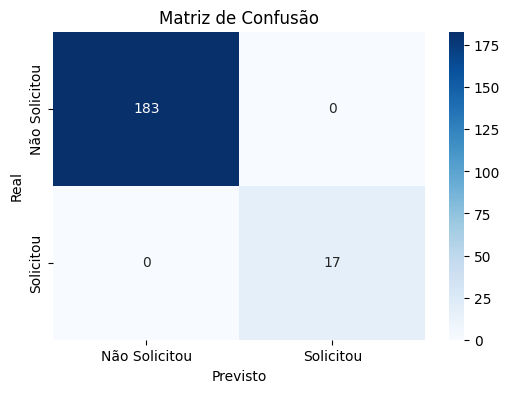

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Gerando a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Solicitou", "Solicitou"], yticklabels=["Não Solicitou", "Solicitou"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

Acurácia: 0.98
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       271
           1       0.93      0.86      0.89        29

    accuracy                           0.98       300
   macro avg       0.96      0.93      0.94       300
weighted avg       0.98      0.98      0.98       300



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


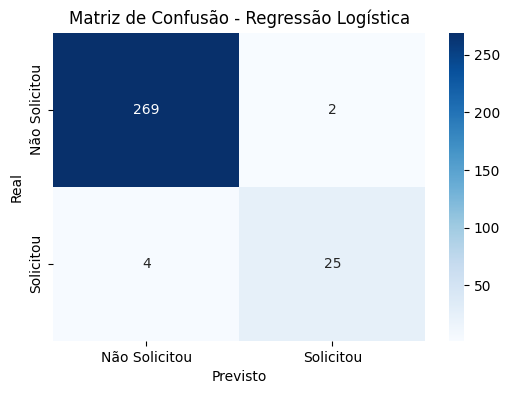

In [ ]:
import xgboost as xgb
# Criando e treinando o modelo de Regressão Logística
modelo_regressao = LogisticRegression(max_iter=1000, random_state=42)
modelo_regressao.fit(X_train, y_train)

# Fazendo previsões
y_pred_regressao = modelo_regressao.predict(X_test)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test, y_pred_regressao))
print(classification_report(y_test, y_pred_regressao))

# Gerando a matriz de confusão
matriz_confusao_regressao = confusion_matrix(y_test, y_pred_regressao)

# Plotando a matriz de confusão para Regressão Logística
plt.figure(figsize=(6,4))
sns.heatmap(matriz_confusao_regressao, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Não Solicitou", "Solicitou"],
            yticklabels=["Não Solicitou", "Solicitou"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

In [ ]:
!pip install xgboost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:39:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       271
           1       1.00      1.00      1.00        29

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



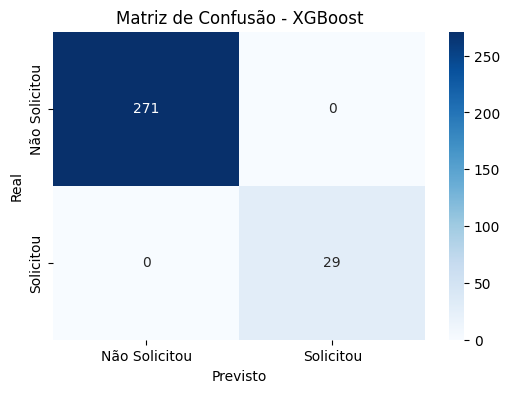

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# Criando e treinando o modelo XGBoost
modelo_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=1)
modelo_xgb.fit(X_train, y_train)

# Fazendo previsões
y_pred_xgb = modelo_xgb.predict(X_test)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Gerando a matriz de confusão
matriz_confusao_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plotando a matriz de confusão para XGBoost
plt.figure(figsize=(6,4))
sns.heatmap(matriz_confusao_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Não Solicitou", "Solicitou"],
            yticklabels=["Não Solicitou", "Solicitou"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - XGBoost")
plt.show()

Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00        17

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



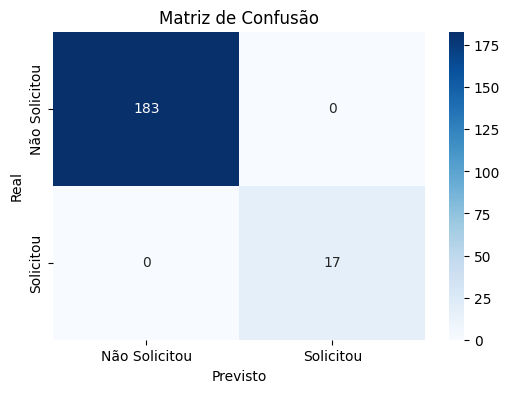

In [ ]:
# Criando e treinando o modelo Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train_minmax, y_train_minmax)

# Fazendo previsões
y_pred_minmax = modelo.predict(X_test_minmax)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test_minmax, y_pred_minmax))
print(classification_report(y_test_minmax, y_pred_minmax))

# Gerando a matriz de confusão
matriz_confusao_minmax = confusion_matrix(y_test_minmax, y_pred_minmax)

# Plotando a matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(matriz_confusao_minmax, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Solicitou", "Solicitou"], yticklabels=["Não Solicitou", "Solicitou"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

Acurácia: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       183
           1       0.94      0.94      0.94        17

    accuracy                           0.99       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.99      0.99      0.99       200



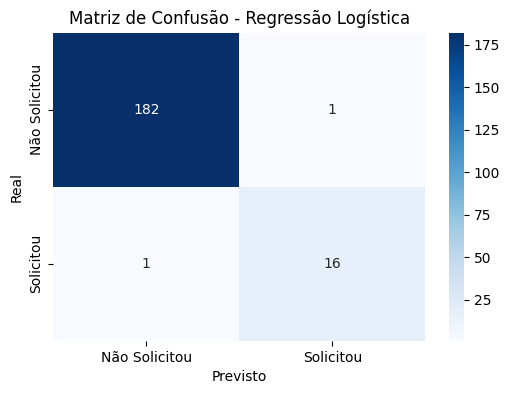

In [ ]:
import xgboost as xgb
# Criando e treinando o modelo de Regressão Logística
modelo_regressao = LogisticRegression(max_iter=1000, random_state=42)
modelo_regressao.fit(X_train_minmax, y_train_minmax)

# Fazendo previsões
y_pred_regressao_minmax = modelo_regressao.predict(X_test_minmax)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test_minmax, y_pred_regressao_minmax))
print(classification_report(y_test_minmax, y_pred_regressao_minmax))

# Gerando a matriz de confusão
matriz_confusao_regressao_minmax = confusion_matrix(y_test_minmax, y_pred_regressao_minmax)

# Plotando a matriz de confusão para Regressão Logística
plt.figure(figsize=(6,4))
sns.heatmap(matriz_confusao_regressao_minmax, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Não Solicitou", "Solicitou"],
            yticklabels=["Não Solicitou", "Solicitou"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:45:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00        17

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



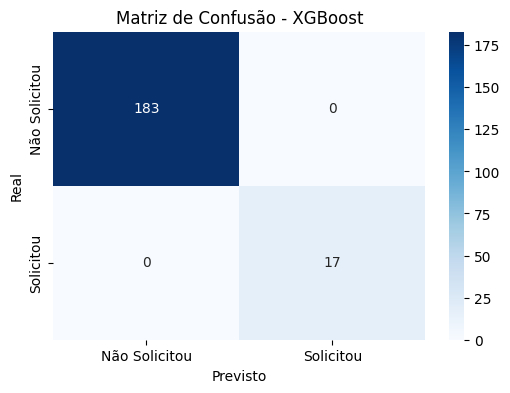

In [ ]:
# Criando e treinando o modelo XGBoost
modelo_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=1)
modelo_xgb.fit(X_train_minmax, y_train_minmax)

# Fazendo previsões
y_pred_xgb_minmax = modelo_xgb.predict(X_test_minmax)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test_minmax, y_pred_xgb_minmax))
print(classification_report(y_test_minmax, y_pred_xgb_minmax))

# Gerando a matriz de confusão
matriz_confusao_xgb_minmax = confusion_matrix(y_test_minmax, y_pred_xgb_minmax)

# Plotando a matriz de confusão para XGBoost
plt.figure(figsize=(6,4))
sns.heatmap(matriz_confusao_xgb_minmax, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Não Solicitou", "Solicitou"],
            yticklabels=["Não Solicitou", "Solicitou"])

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - XGBoost")
plt.show()

In [ ]:
# Criando e treinando o modelo Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train_minmax, y_train_minmax)

# Fazendo previsões
y_pred_minmax = modelo.predict(X_test_minmax)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test_minmax, y_pred_minmax))
print(classification_report(y_test_minmax, y_pred_minmax))

# Gerando a matriz de confusão
matriz_confusao_minmax = confusion_matrix(y_test_minmax, y_pred_minmax)

# Plotando a matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(matriz_confusao_minmax, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Solicitou", "Solicitou"], yticklabels=["Não Solicitou", "Solicitou"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()